In [2]:
import numpy as np
xy=np.loadtxt("/content/wine.csv",delimiter=",",
              dtype=np.float32,
              skiprows=1)

In [3]:
print(xy.shape)

(178, 14)


In [4]:
x=xy[:,1:]
y=xy[:,0]

In [5]:
n_samples=xy.shape[0]
n_features=xy.shape[1]-1
print(n_samples)
print(n_features)

178
13


----------- Tutorial 9-------------------------

In [6]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

In [7]:
class WineDataset(Dataset):
  def __init__(self):
    # Data Loading............
    xy=np.loadtxt("/content/wine.csv",delimiter=",",
              dtype=np.float32,
              skiprows=1)
    self.x=xy[:,1:]
    self.y=xy[:,0]
    self.n_samples=xy.shape[0]
    self.n_features=xy.shape[1]-1
  def __getitem__(self,index:int):
    return self.x[index],self.y[index]
  def __len__(self):
    #Length of the dataset
    return self.n_samples  


In [8]:
dataset=WineDataset()

In [9]:
first_data=dataset[0]

In [10]:
first_data

(array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03], dtype=float32), 1.0)

In [11]:
x,y=first_data
print(x)
print(y)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
1.0


In [12]:
dataloader=DataLoader(dataset=dataset,
                      batch_size=4,
                      shuffle=True)

In [13]:
dataiter=iter(dataloader)
data=next(dataiter)

In [14]:
features,labels=data
print(features)
print(labels)

tensor([[1.2880e+01, 2.9900e+00, 2.4000e+00, 2.0000e+01, 1.0400e+02, 1.3000e+00,
         1.2200e+00, 2.4000e-01, 8.3000e-01, 5.4000e+00, 7.4000e-01, 1.4200e+00,
         5.3000e+02],
        [1.2160e+01, 1.6100e+00, 2.3100e+00, 2.2800e+01, 9.0000e+01, 1.7800e+00,
         1.6900e+00, 4.3000e-01, 1.5600e+00, 2.4500e+00, 1.3300e+00, 2.2600e+00,
         4.9500e+02],
        [1.2470e+01, 1.5200e+00, 2.2000e+00, 1.9000e+01, 1.6200e+02, 2.5000e+00,
         2.2700e+00, 3.2000e-01, 3.2800e+00, 2.6000e+00, 1.1600e+00, 2.6300e+00,
         9.3700e+02],
        [1.3830e+01, 1.6500e+00, 2.6000e+00, 1.7200e+01, 9.4000e+01, 2.4500e+00,
         2.9900e+00, 2.2000e-01, 2.2900e+00, 5.6000e+00, 1.2400e+00, 3.3700e+00,
         1.2650e+03]])
tensor([3., 2., 2., 1.])


In [15]:
import math
num_epochs=2
total_samples=len(dataset)
n_steps=math.ceil(total_samples/4)
print(total_samples,n_steps)

178 45


In [16]:
for epoch in range(num_epochs):
  for i,(input,label) in enumerate(dataloader):
    if((i+1)%5==0):
      print(f"Epoch {epoch+1}/{num_epochs},step {i+1}/ {n_steps},Input: {input.shape}")


Epoch 1/2,step 5/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 10/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 15/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 20/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 25/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 30/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 35/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 40/ 45,Input: torch.Size([4, 13])
Epoch 1/2,step 45/ 45,Input: torch.Size([2, 13])
Epoch 2/2,step 5/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 10/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 15/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 20/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 25/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 30/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 35/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 40/ 45,Input: torch.Size([4, 13])
Epoch 2/2,step 45/ 45,Input: torch.Size([2, 13])


In [17]:
#Neural Network

import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot  as plt

In [18]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [19]:
input_size=784
hidden_size=100
num_classes=10
num_epochs=5
batch_size=64
learning_rate=0.001

In [20]:
train_dataset=torchvision.datasets.MNIST(root="/content/data",train=True,transform=transforms.ToTensor(),
                                          download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw



In [21]:
test_dataset=torchvision.datasets.MNIST(root="/content/data",train=False,transform=transforms.ToTensor(),
                                          download=True)

In [22]:
train_loader=DataLoader(dataset=train_dataset,
                        batch_size=batch_size,
                        shuffle=True)
test_loader=DataLoader(dataset=test_dataset,
                        batch_size=batch_size,
                        shuffle=True)

In [23]:
example=iter(train_loader)
example_data,label=next(example)

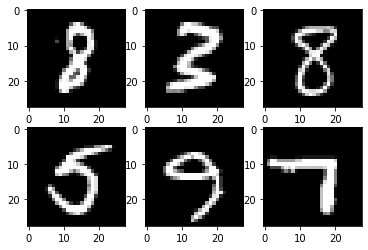

In [24]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0],cmap='gray')

In [25]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)
  def forward(self,input):
    output=self.l1(input)
    output=self.relu(output)
    output=self.l2(output)
    return output  


In [26]:
model=NeuralNet(input_size,hidden_size,num_classes)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [27]:
n_total_steps=len(train_loader)
model=model.to(device)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    output=model(images)
    loss=loss_fn(output,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if((i+1)%100==0):
      print(f"Epoch {epoch+1}/{num_epochs},step {i+1}/ {n_total_steps},loss: {loss.item()}")

Epoch 1/5,step 100/ 938,loss: 0.4091550409793854
Epoch 1/5,step 200/ 938,loss: 0.1787877231836319
Epoch 1/5,step 300/ 938,loss: 0.2703094780445099
Epoch 1/5,step 400/ 938,loss: 0.28896164894104004
Epoch 1/5,step 500/ 938,loss: 0.24074400961399078
Epoch 1/5,step 600/ 938,loss: 0.44127318263053894
Epoch 1/5,step 700/ 938,loss: 0.31570836901664734
Epoch 1/5,step 800/ 938,loss: 0.23788560926914215
Epoch 1/5,step 900/ 938,loss: 0.12365806847810745
Epoch 2/5,step 100/ 938,loss: 0.23736540973186493
Epoch 2/5,step 200/ 938,loss: 0.15640093386173248
Epoch 2/5,step 300/ 938,loss: 0.33099424839019775
Epoch 2/5,step 400/ 938,loss: 0.14992046356201172
Epoch 2/5,step 500/ 938,loss: 0.061162855476140976
Epoch 2/5,step 600/ 938,loss: 0.2572493255138397
Epoch 2/5,step 700/ 938,loss: 0.21411263942718506
Epoch 2/5,step 800/ 938,loss: 0.05713968351483345
Epoch 2/5,step 900/ 938,loss: 0.08195285499095917
Epoch 3/5,step 100/ 938,loss: 0.12391994893550873
Epoch 3/5,step 200/ 938,loss: 0.07671687006950378
Epo

In [28]:
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    output=model(images)
    _,predicted=torch.max(output.data,1)
    n_samples+=labels.size(0)
    n_correct+=(predicted==labels).sum().item()
  acc=100.0* (n_correct/n_samples)
  print(f"{acc} %")  

97.3 %


In [29]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot  as plt

In [30]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [31]:
num_epochs=2
batch_size=4
learning_rate=0.001


In [32]:
# Transforms.. ToTensor, Normalize(mean,std)
transform=transforms.Compose(
    [
        transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

In [33]:
train_dataset=torchvision.datasets.CIFAR10(
    root="/data",
    train=True,
    download=True,
    transform=transforms
)
test_dataset=torchvision.datasets.CIFAR10(
    root="/data",
    train=False,
    download=True,
    transform=transforms
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /data/cifar-10-python.tar.gz to /data
Files already downloaded and verified


In [34]:
train_loader=DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_loader=DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [35]:
classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

------------ Tutorial 10 ----------

In [36]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np
# a class WineDataset to return our data and its labels
class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('/content/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

# Custom Transforms
# implement __call__(self, sample)
#to convert inputs and labels into tensors
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
#to multiply the input by a factor 
class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


-------------------Tutorial 11------------------------------

In [37]:
import torch
import torch.nn as nn
import numpy as np


# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability
# sum of all probabilities is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1
Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


---------------------Tutorial 12---------------------------

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


-------------------------------Tutorial 13-----------------------------

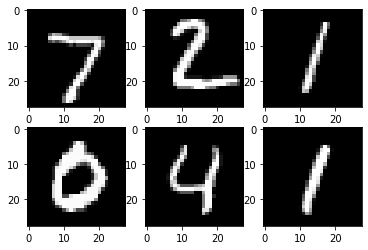

Epoch [1/2], Step [100/600], Loss: 0.3232
Epoch [1/2], Step [200/600], Loss: 0.2879
Epoch [1/2], Step [300/600], Loss: 0.3060
Epoch [1/2], Step [400/600], Loss: 0.1361
Epoch [1/2], Step [500/600], Loss: 0.1670
Epoch [1/2], Step [600/600], Loss: 0.1186
Epoch [2/2], Step [100/600], Loss: 0.2113
Epoch [2/2], Step [200/600], Loss: 0.0518
Epoch [2/2], Step [300/600], Loss: 0.0969
Epoch [2/2], Step [400/600], Loss: 0.0663
Epoch [2/2], Step [500/600], Loss: 0.1032
Epoch [2/2], Step [600/600], Loss: 0.0829
Accuracy of the network on the 10000 test images: 96.87 %


In [39]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

--------------------------Tutorial 14 -----------------------------

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


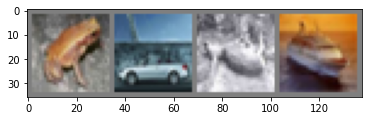

Epoch [1/5], Step [2000/12500], Loss: 2.2825
Epoch [1/5], Step [4000/12500], Loss: 2.2874
Epoch [1/5], Step [6000/12500], Loss: 2.2822
Epoch [1/5], Step [8000/12500], Loss: 2.2853
Epoch [1/5], Step [10000/12500], Loss: 2.1971
Epoch [1/5], Step [12000/12500], Loss: 2.3298
Epoch [2/5], Step [2000/12500], Loss: 2.2263
Epoch [2/5], Step [4000/12500], Loss: 2.1875
Epoch [2/5], Step [6000/12500], Loss: 2.1454
Epoch [2/5], Step [8000/12500], Loss: 2.1953
Epoch [2/5], Step [10000/12500], Loss: 1.8977
Epoch [2/5], Step [12000/12500], Loss: 1.1099
Epoch [3/5], Step [2000/12500], Loss: 1.0752
Epoch [3/5], Step [4000/12500], Loss: 1.8606
Epoch [3/5], Step [6000/12500], Loss: 0.6035
Epoch [3/5], Step [8000/12500], Loss: 1.4859
Epoch [3/5], Step [10000/12500], Loss: 2.0263
Epoch [3/5], Step [12000/12500], Loss: 1.2807
Epoch [4/5], Step [2000/12500], Loss: 1.6136
Epoch [4/5], Step [4000/12500], Loss: 1.3730
Epoch [4/5], Step [6000/12500], Loss: 1.5671
Epoch [4/5], Step [8000/12500], Loss: 1.7045
Epoc

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

---------------------Tutorial 15------------------------

['ants', 'bees']


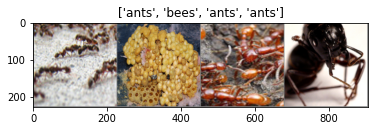

Epoch 0/24
----------
train Loss: 0.6581 Acc: 0.6107
val Loss: 0.4024 Acc: 0.9085

Epoch 1/24
----------
train Loss: 0.5356 Acc: 0.7664
val Loss: 0.2945 Acc: 0.9346

Epoch 2/24
----------
train Loss: 0.4963 Acc: 0.7582
val Loss: 0.2286 Acc: 0.9412

Epoch 3/24
----------
train Loss: 0.4427 Acc: 0.8156
val Loss: 0.2054 Acc: 0.9542

Epoch 4/24
----------
train Loss: 0.4425 Acc: 0.8033
val Loss: 0.1916 Acc: 0.9281

Epoch 5/24
----------
train Loss: 0.3867 Acc: 0.8238
val Loss: 0.1809 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.4058 Acc: 0.8033
val Loss: 0.1815 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.3433 Acc: 0.8484
val Loss: 0.1782 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3549 Acc: 0.8811
val Loss: 0.1825 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.4261 Acc: 0.7951
val Loss: 0.1924 Acc: 0.9216

Epoch 10/24
----------
train Loss: 0.2843 Acc: 0.9098
val Loss: 0.1762 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3483 Acc: 0.8730
val Loss: 0.1706 Acc: 0.9346

Ep

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

----------------Tutorial 16---------------------

Epoch [1/1], Step [100/938], Loss: 0.4120
Epoch [1/1], Step [200/938], Loss: 0.2598
Epoch [1/1], Step [300/938], Loss: 0.3353
Epoch [1/1], Step [400/938], Loss: 0.1768
Epoch [1/1], Step [500/938], Loss: 0.1860
Epoch [1/1], Step [600/938], Loss: 0.2160
Epoch [1/1], Step [700/938], Loss: 0.1152
Epoch [1/1], Step [800/938], Loss: 0.0968
Epoch [1/1], Step [900/938], Loss: 0.0974
Accuracy of the network on the 10000 test images: 95.87 %


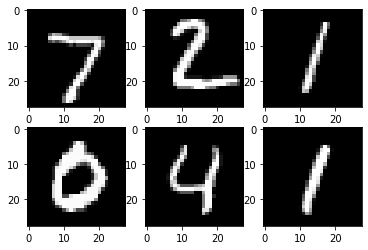

In [42]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
#writer.close()
#sys.exit()
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################

------------ Tutorial 17 ---------------------

In [43]:
import torch
import torch.nn as nn

''' 3 DIFFERENT METHODS TO REMEMBER:
 - torch.save(arg, PATH) # can be model, tensor, or dictionary
 - torch.load(PATH)
 - torch.load_state_dict(arg)
'''

''' 2 DIFFERENT WAYS OF SAVING
# 1) lazy way: save whole model
torch.save(model, PATH)
# model class must be defined somewhere
model = torch.load(PATH)
model.eval()
# 2) recommended way: save only the state_dict
torch.save(model.state_dict(), PATH)
# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''


class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model...

####################save all ######################################
for param in model.parameters():
    print(param)

# save and load entire model

FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)


############save only state dict #########################

# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

print(loaded_model.state_dict())


###########load checkpoint#####################
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()
# - or -
# model.train()

print(optimizer.state_dict())

Parameter containing:
tensor([[-0.4076,  0.1622,  0.3182,  0.2466, -0.1332, -0.1814]],
       requires_grad=True)
Parameter containing:
tensor([-0.2827], requires_grad=True)
Parameter containing:
tensor([[-0.4076,  0.1622,  0.3182,  0.2466, -0.1332, -0.1814]],
       requires_grad=True)
Parameter containing:
tensor([-0.2827], requires_grad=True)
OrderedDict([('linear.weight', tensor([[-0.4076,  0.1622,  0.3182,  0.2466, -0.1332, -0.1814]])), ('linear.bias', tensor([-0.2827]))])
OrderedDict([('linear.weight', tensor([[-0.4076,  0.1622,  0.3182,  0.2466, -0.1332, -0.1814]])), ('linear.bias', tensor([-0.2827]))])
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 